# PROBLEM STATEMENT

TITANIC

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset using pandas dataframe
training_set=pd.read_csv('Train_Titanic.csv')


In [3]:
# show data set
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#VISUALIZE DATASET


In [5]:
# count survivors and non - survivors
survivors = training_set[training_set["Survived"] == 1]
no_survived = training_set[training_set["Survived"] ==0]

In [6]:
#count the survived and deceased
print("Total = " ,len(training_set))

print("Number of survived passenger = ",len(survivors))
print("Percentage survived = ",len(survivors)/len(training_set)*100.0,"%")

print("Did not survived = " , len(no_survived))
print("percentage who did not suvived = ",len(no_survived)/len(training_set))



Total =  891
Number of survived passenger =  342
Percentage survived =  38.38383838383838 %
Did not survived =  549
percentage who did not suvived =  0.6161616161616161


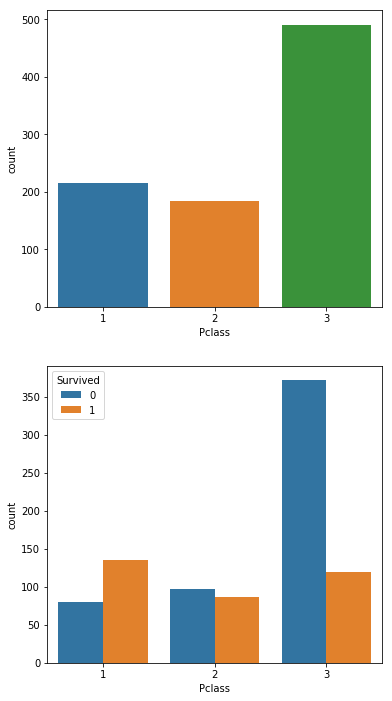

In [7]:
#bar chart to indicaet the number of people survived based on their class
# if you are og higher class, you have higher chance of survival
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass' , data = training_set)
plt.subplot(212)
sns.countplot(x= 'Pclass',hue = "Survived" ,data = training_set)


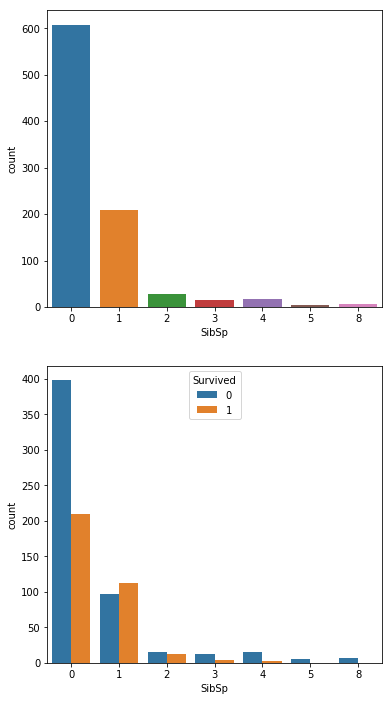

In [8]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='SibSp',data = training_set)
plt.subplot(212)
sns.countplot(x="SibSp",hue='Survived',data = training_set)

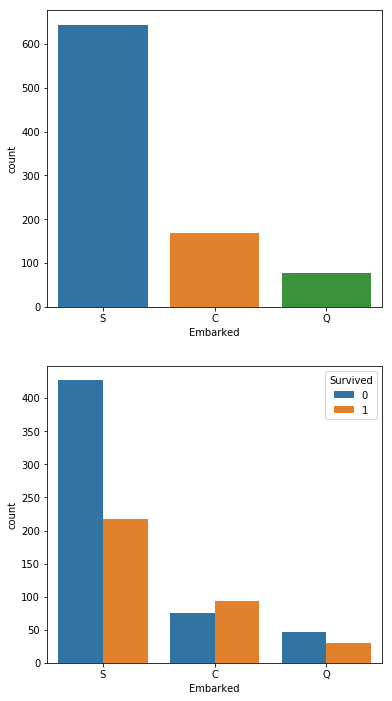

In [9]:
#bar chart to indicaet the number of people survived based on the port they empord from
#port of embarkation C= Cherbourg , Q = Queenstown ,S = Southampton
#if you embark from C ,you have higher chance of survival compares to other
plt.figure(figsize  = [6,12])

plt.subplot(211)
sns.countplot(x = 'Embarked' , data = training_set)
plt.subplot(212)
sns.countplot(x= 'Embarked',hue = "Survived" ,data = training_set)


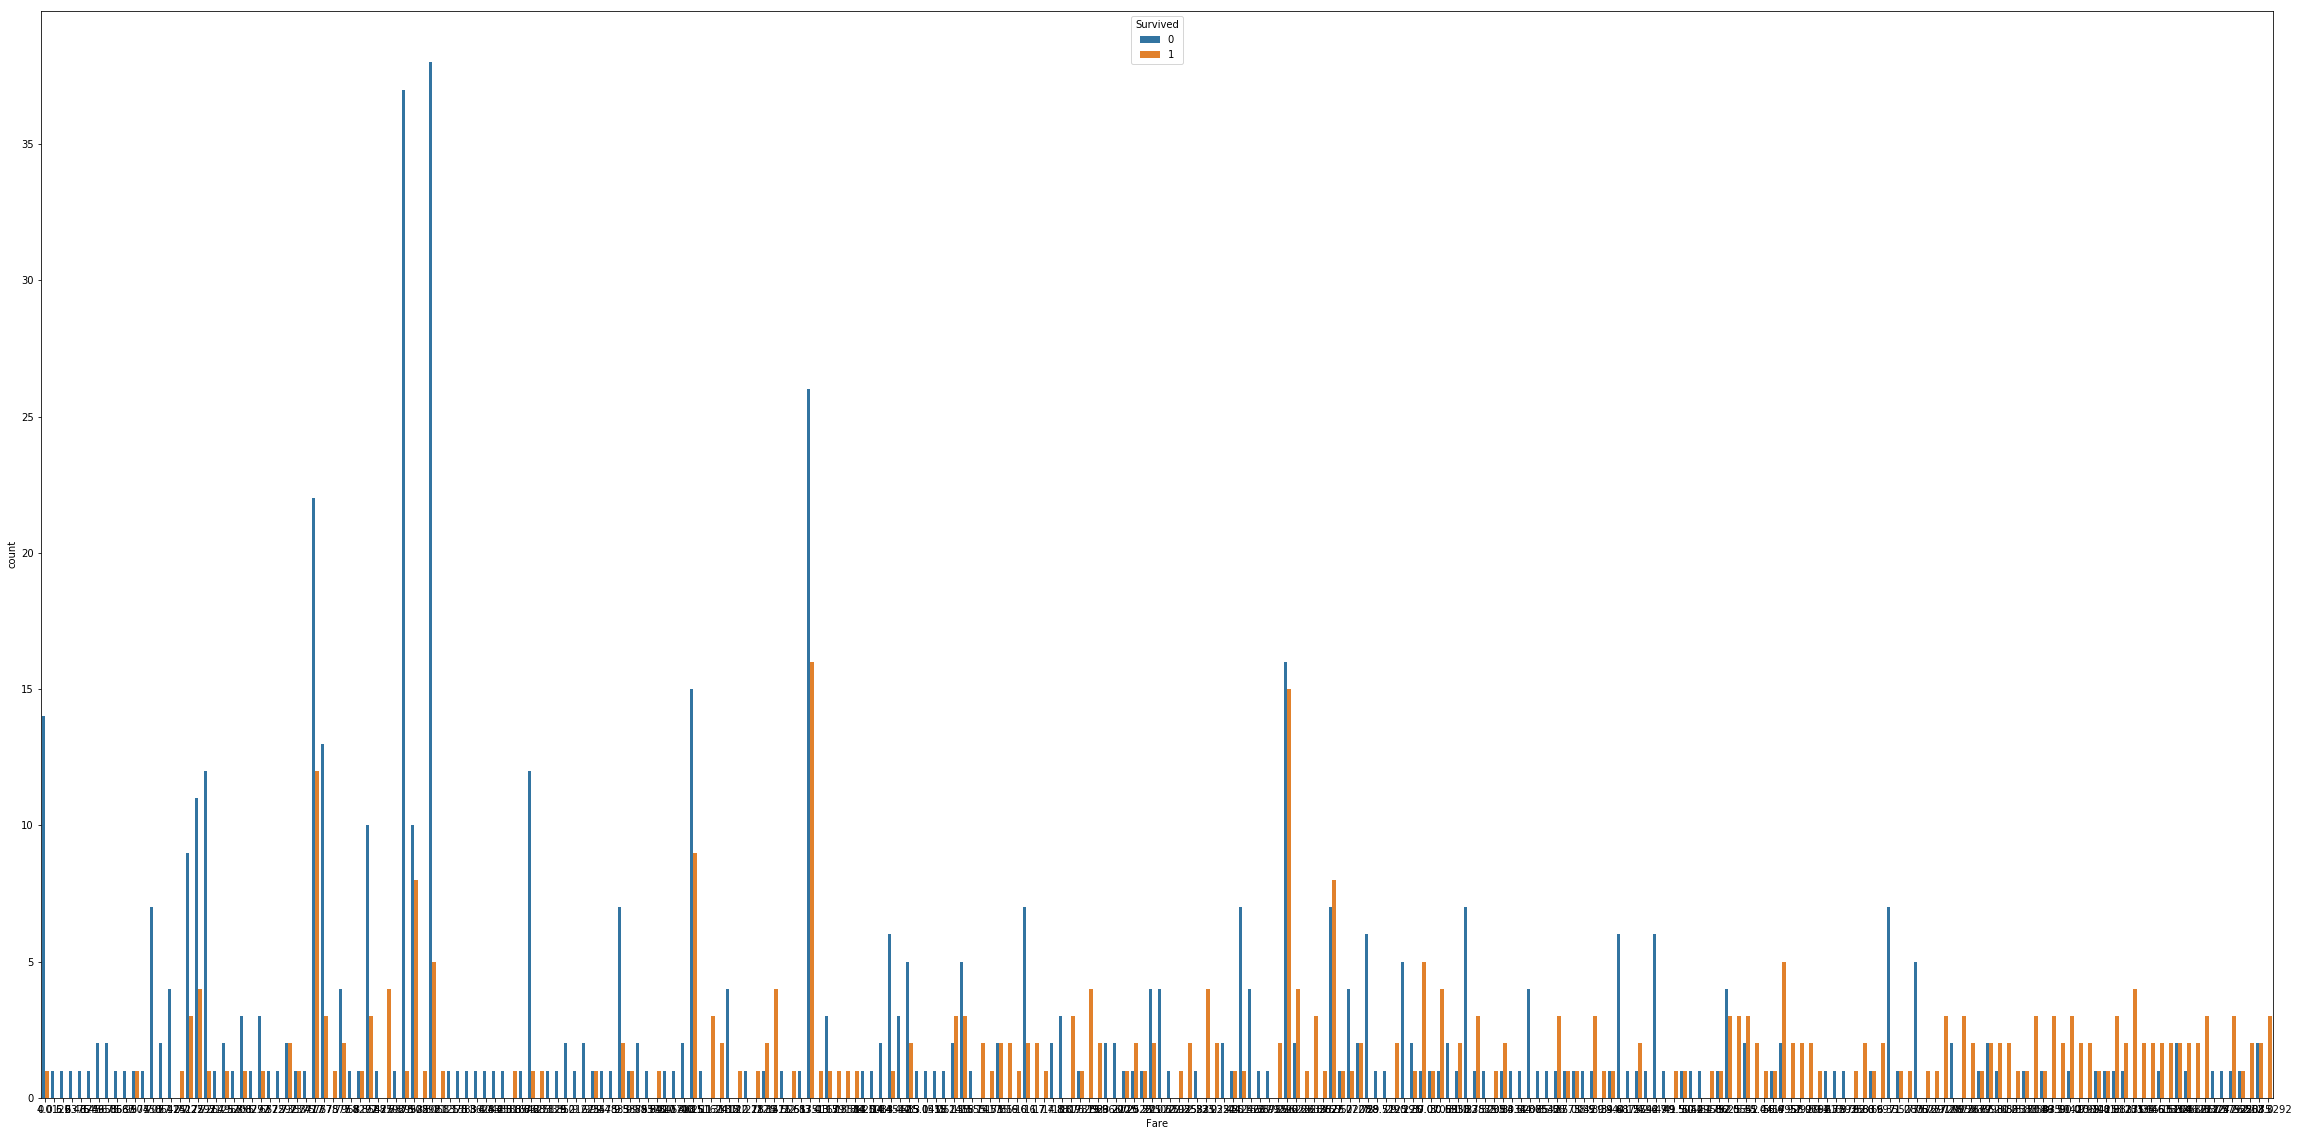

In [10]:

# bar chart to indicate the number of people survived based on their fare
#if you pay higher fair,you hVE A HIGHERm chance of survival
plt.figure(figsize = (40,20))
sns.countplot(x= 'Fare',hue ='Survived', data= training_set)

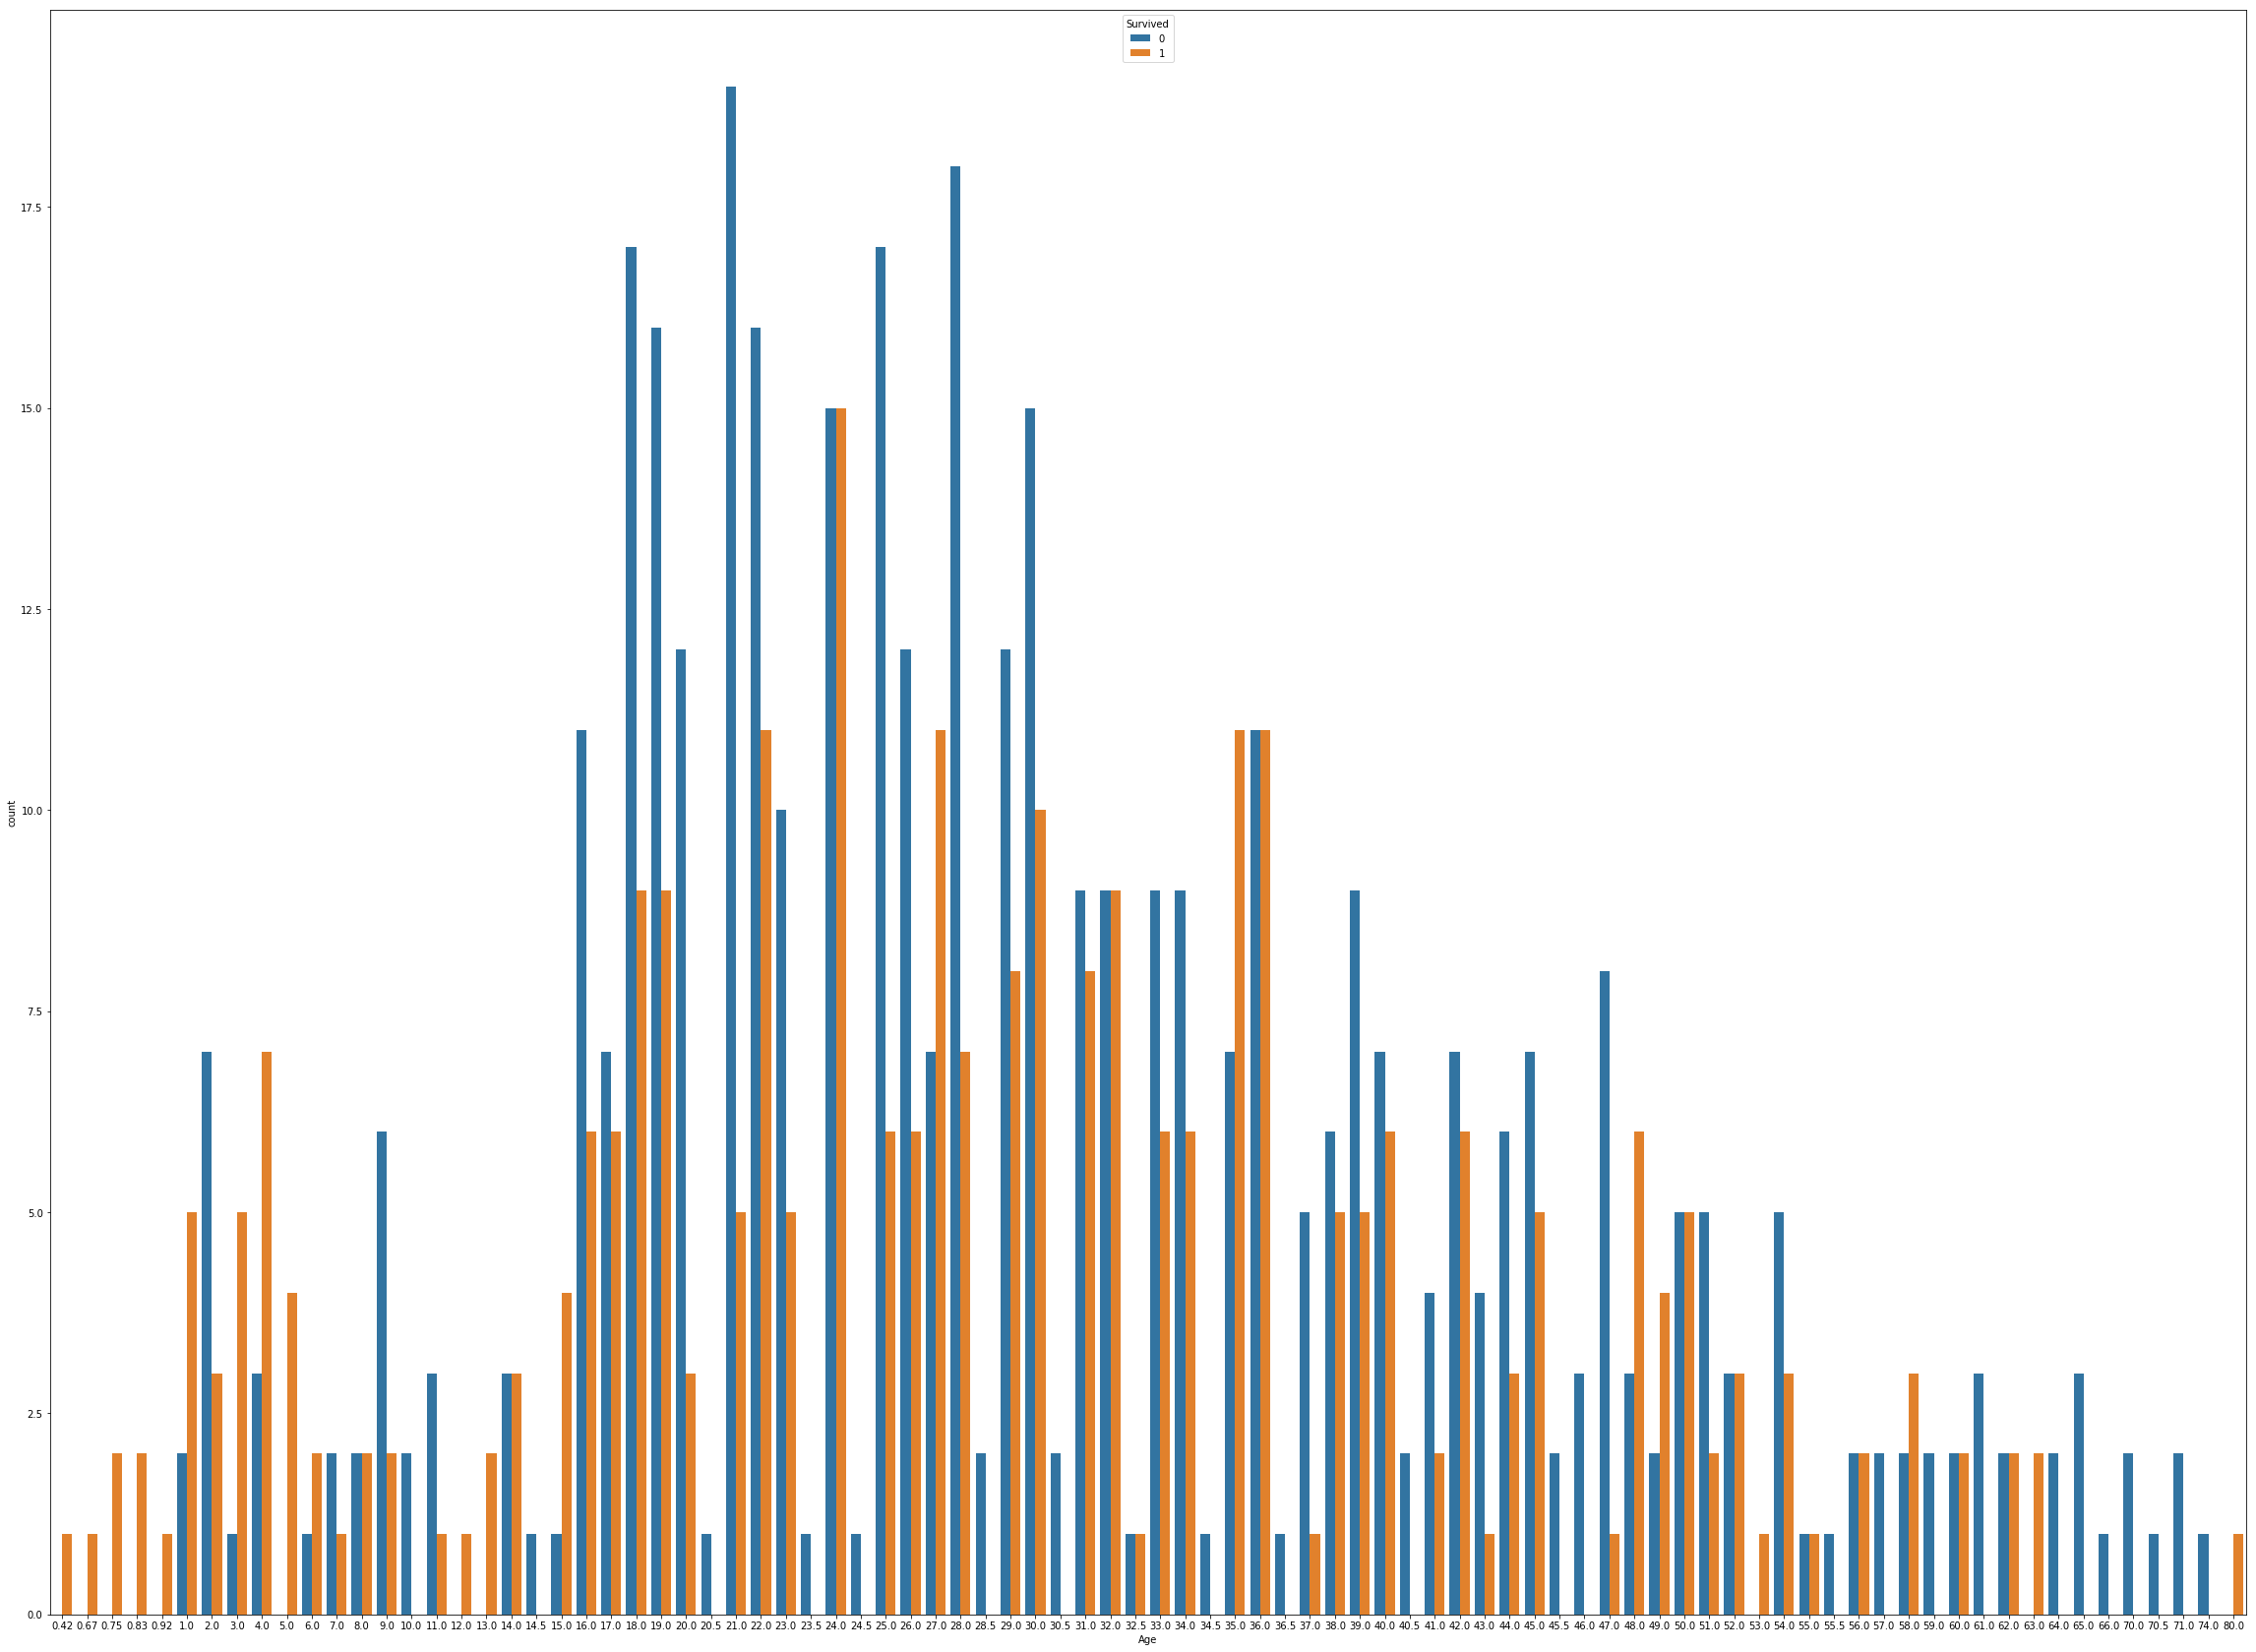

In [11]:
plt.figure(figsize = (40,30))
sns.countplot(x ='Age',hue ="Survived",data = training_set)

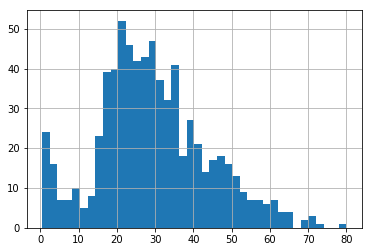

In [12]:
training_set['Age'].hist(bins=40)

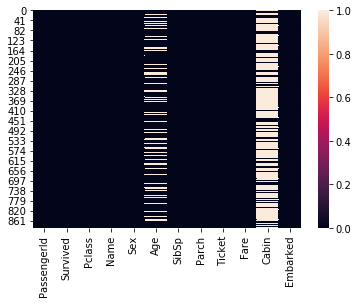

In [13]:

# step 3 preparing data for training or data cleaning
sns.heatmap(training_set.isnull())


In [14]:
# let drop the cabin compound colimn and test with inplace =  true and false
training_set.drop("Cabin",axis=1,inplace =False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
training_set.drop("Cabin",axis=1,inplace =True)

In [16]:
#drop ambarked as well
training_set.drop(['Name','Ticket','Embarked'],axis= 1,inplace = True)

In [17]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


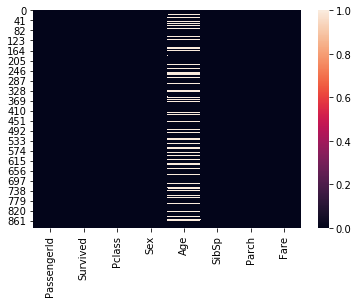

In [18]:
# view data one more time
sns.heatmap(training_set.isnull())

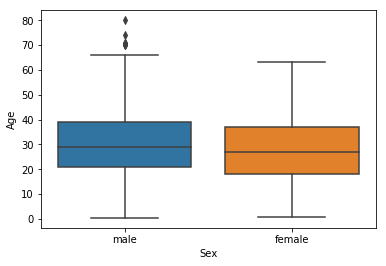

In [19]:
# get the average age of male (29) and female (25)
#plt.figure(figsize=[15,10])
sns.boxplot(x='Sex',y='Age',data = training_set)


In [20]:
def fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is "male":
            return 29
        else:
            return 25
    else:
        return age

In [21]:
training_set['Age'] = training_set[['Age','Sex']].apply(fill_age,axis = 1)

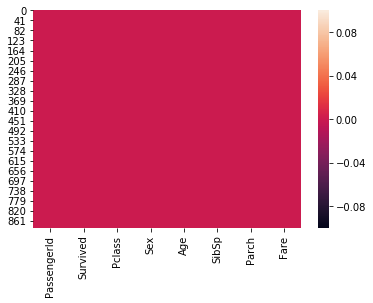

In [22]:
# view data one more time
sns.heatmap(training_set.isnull())

In [23]:
pd.get_dummies(training_set['Sex']).head()
# you just need onr column to represent male or female

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [24]:
male = pd.get_dummies(training_set['Sex'],drop_first=True)

In [25]:
#first lets drop the embarded and sex
training_set.drop(['Sex'],axis =1,inplace=True)

In [26]:
training_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
# Model TRIANING

In [28]:
# lets drop target column
X=training_set.drop('Survived',axis = 1).values
y=training_set['Survived'].values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#fitting logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

C:\Users\SUSHEN\Anaconda3\envs\the_best_chatbot\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

MOdel TEsting

In [33]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [34]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

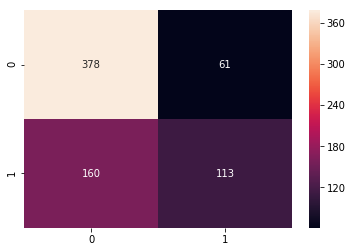

In [35]:
from sklearn.metrics import classification_report ,confusion_matrix
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True,fmt='d')

In [36]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

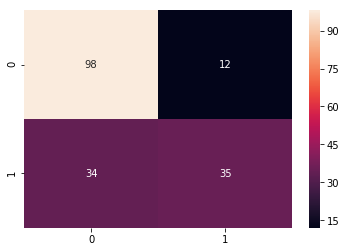

In [37]:
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True,fmt='d')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       110
           1       0.74      0.51      0.60        69

   micro avg       0.74      0.74      0.74       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.74      0.74      0.73       179



In [39]:
from sklearn.metrics import accuracy_score
print("\n accuracy score is = " ,accuracy_score(y_test,y_predict_test))


 accuracy score is =  0.7430167597765364


In [141]:
training_set = pd.read_csv("Train_Titanic.csv")

In [142]:
# data cleaning

In [143]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
# count survivors and non - survivors
survivors = training_set[training_set["Survived"] == 1]
no_survived = training_set[training_set["Survived"] ==0]

In [145]:
#count the survived and deceased
print("Total = " ,len(training_set))

print("Number of survived passenger = ",len(survivors))
print("Percentage survived = ",len(survivors)/len(training_set)*100.0,"%")

print("Did not survived = " , len(no_survived))
print("percentage who did not suvived = ",len(no_survived)/len(training_set))


Total =  891
Number of survived passenger =  342
Percentage survived =  38.38383838383838 %
Did not survived =  549
percentage who did not suvived =  0.6161616161616161


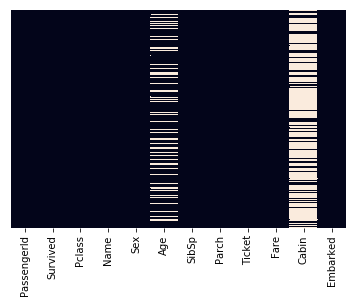

In [146]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False)

In [147]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
training_set.drop('Cabin',axis =1,inplace=True)
training_set.drop(['Name',"Ticket",'Embarked'],axis = 1,inplace=True)

In [149]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


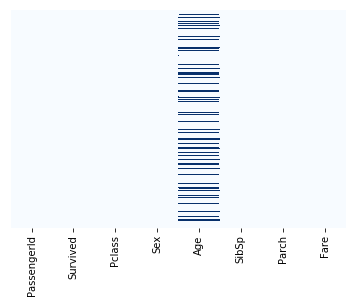

In [150]:
sns.heatmap(training_set.isnull(),yticklabels = False,cbar = False,cmap = 'Blues')

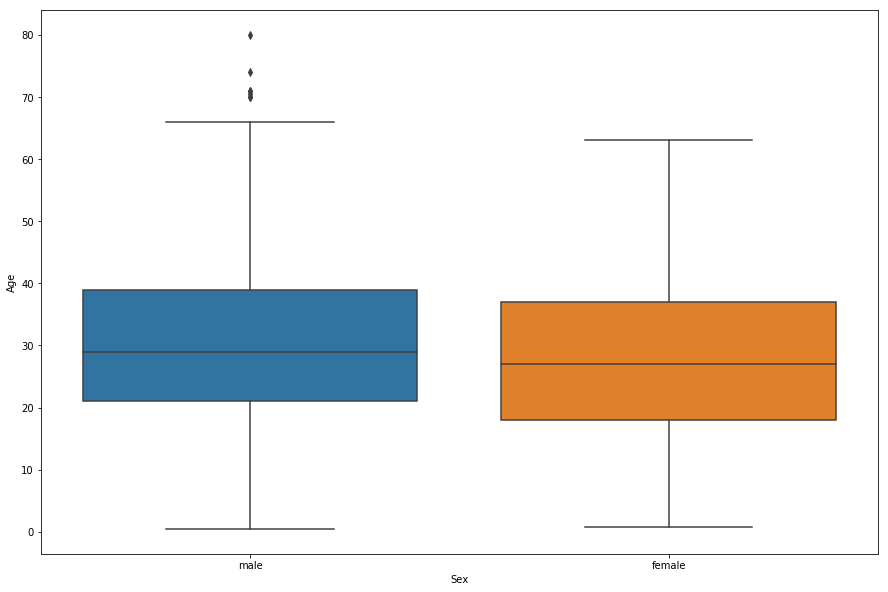

In [151]:
plt.figure(figsize = (15,10))
sns.boxplot(x='Sex',y='Age',data = training_set)

In [152]:
def Fill_Age(data):
    age = data[0]
    sex= data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

In [153]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis=1)

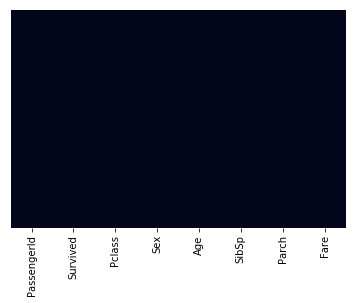

In [154]:
sns.heatmap(training_set.isnull(),yticklabels = False,cbar = False)

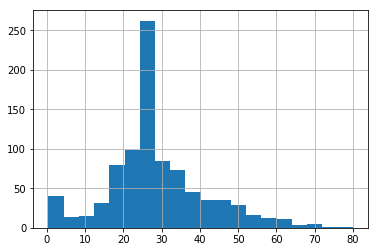

In [155]:
training_set['Age'].hist(bins = 20)

In [156]:
training_set.drop(['PassengerId'],axis =1,inplace =True)


In [157]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [158]:
male = pd.get_dummies(training_set['Sex'],drop_first =True)

In [159]:
training_set.drop(['Sex'],axis =1,inplace =True)
male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [160]:
male=pd.DataFrame(male,dtype=int)


In [161]:
training_set=pd.concat([training_set,male],axis = 1)

In [162]:
X=training_set.drop('Survived',axis =1).values

In [163]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [164]:
y=training_set['Survived'].values

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [166]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\SUSHEN\Anaconda3\envs\the_best_chatbot\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
y_predict = classifier.predict(X_test)

In [168]:
y_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

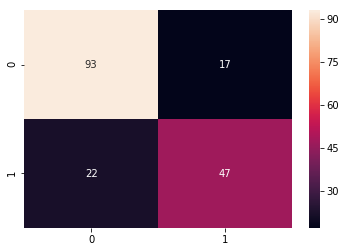

In [169]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt = 'd')

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

   micro avg       0.78      0.78      0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [171]:
from sklearn.metrics import accuracy_score
print("\n accuracy score is = " ,accuracy_score(y_test,y_predict))


 accuracy score is =  0.7821229050279329
